<a href="https://colab.research.google.com/github/rickyException/Principles-of-ML/blob/main/1080_ML_A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, roc_curve,confusion_matrix,accuracy_score,precision_score,recall_score, f1_score

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Convert data and targets to pandas DataFrames
X_df = pd.DataFrame(wine_quality.data.features, columns=wine_quality.feature_names)
y_df = pd.DataFrame(wine_quality.data.targets, columns=['quality'])

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_df)

# Encoding categorical variables (if any)
# In this dataset, there are no categorical variables to encode

# Normalization and Standardization
# We'll use StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Convert y to 1D array
y = y_df.values.ravel()

# Let's print the first few rows of X_scaled and y to verify the pre-processing
print("First few rows of X_scaled:")
print(X_scaled[:5])
print("\nFirst few rows of y:")
print(y[:5])


First few rows of X_scaled:
[[ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]
 [ 0.45103572  3.28223494 -2.19283252 -0.59764007  1.1979747  -0.31132009
  -0.86246863  0.70148631 -0.11507303  0.99957862 -0.58006813]
 [ 0.45103572  2.55330026 -1.91755268 -0.66069923  1.02669737 -0.87476278
  -1.09248586  0.76818761  0.25811972  0.79795816 -0.58006813]
 [ 3.07381662 -0.36243847  1.66108525 -0.7447781   0.54141159 -0.76207424
  -0.98632406  1.10169412 -0.3638682   0.32751041 -0.58006813]
 [ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416]]

First few rows of y:
[5 5 5 6 5]


In [5]:
# Summary statistics for features
feature_summary = X_df.describe()
print("Summary statistics for features:")
print(feature_summary)

# Summary statistics for target variable
target_summary = y_df.describe()
print("\nSummary statistics for target variable (quality):")
print(target_summary)


Summary statistics for features:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009

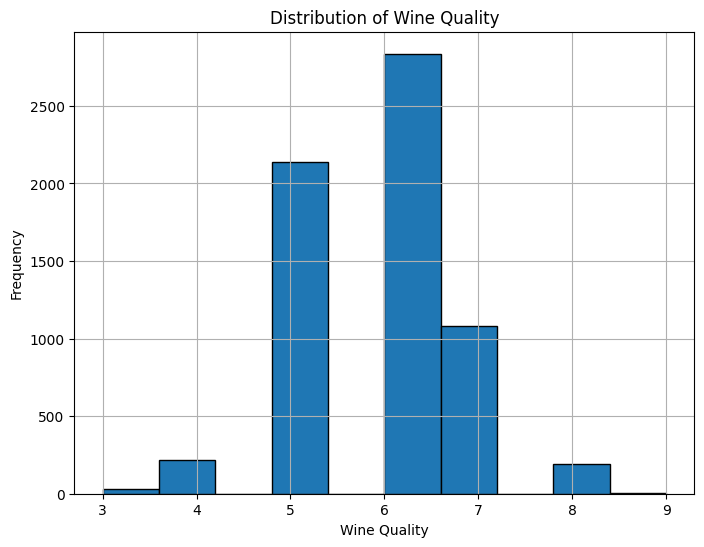

In [6]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable (wine quality)
plt.figure(figsize=(8, 6))
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.grid(True)
plt.show()


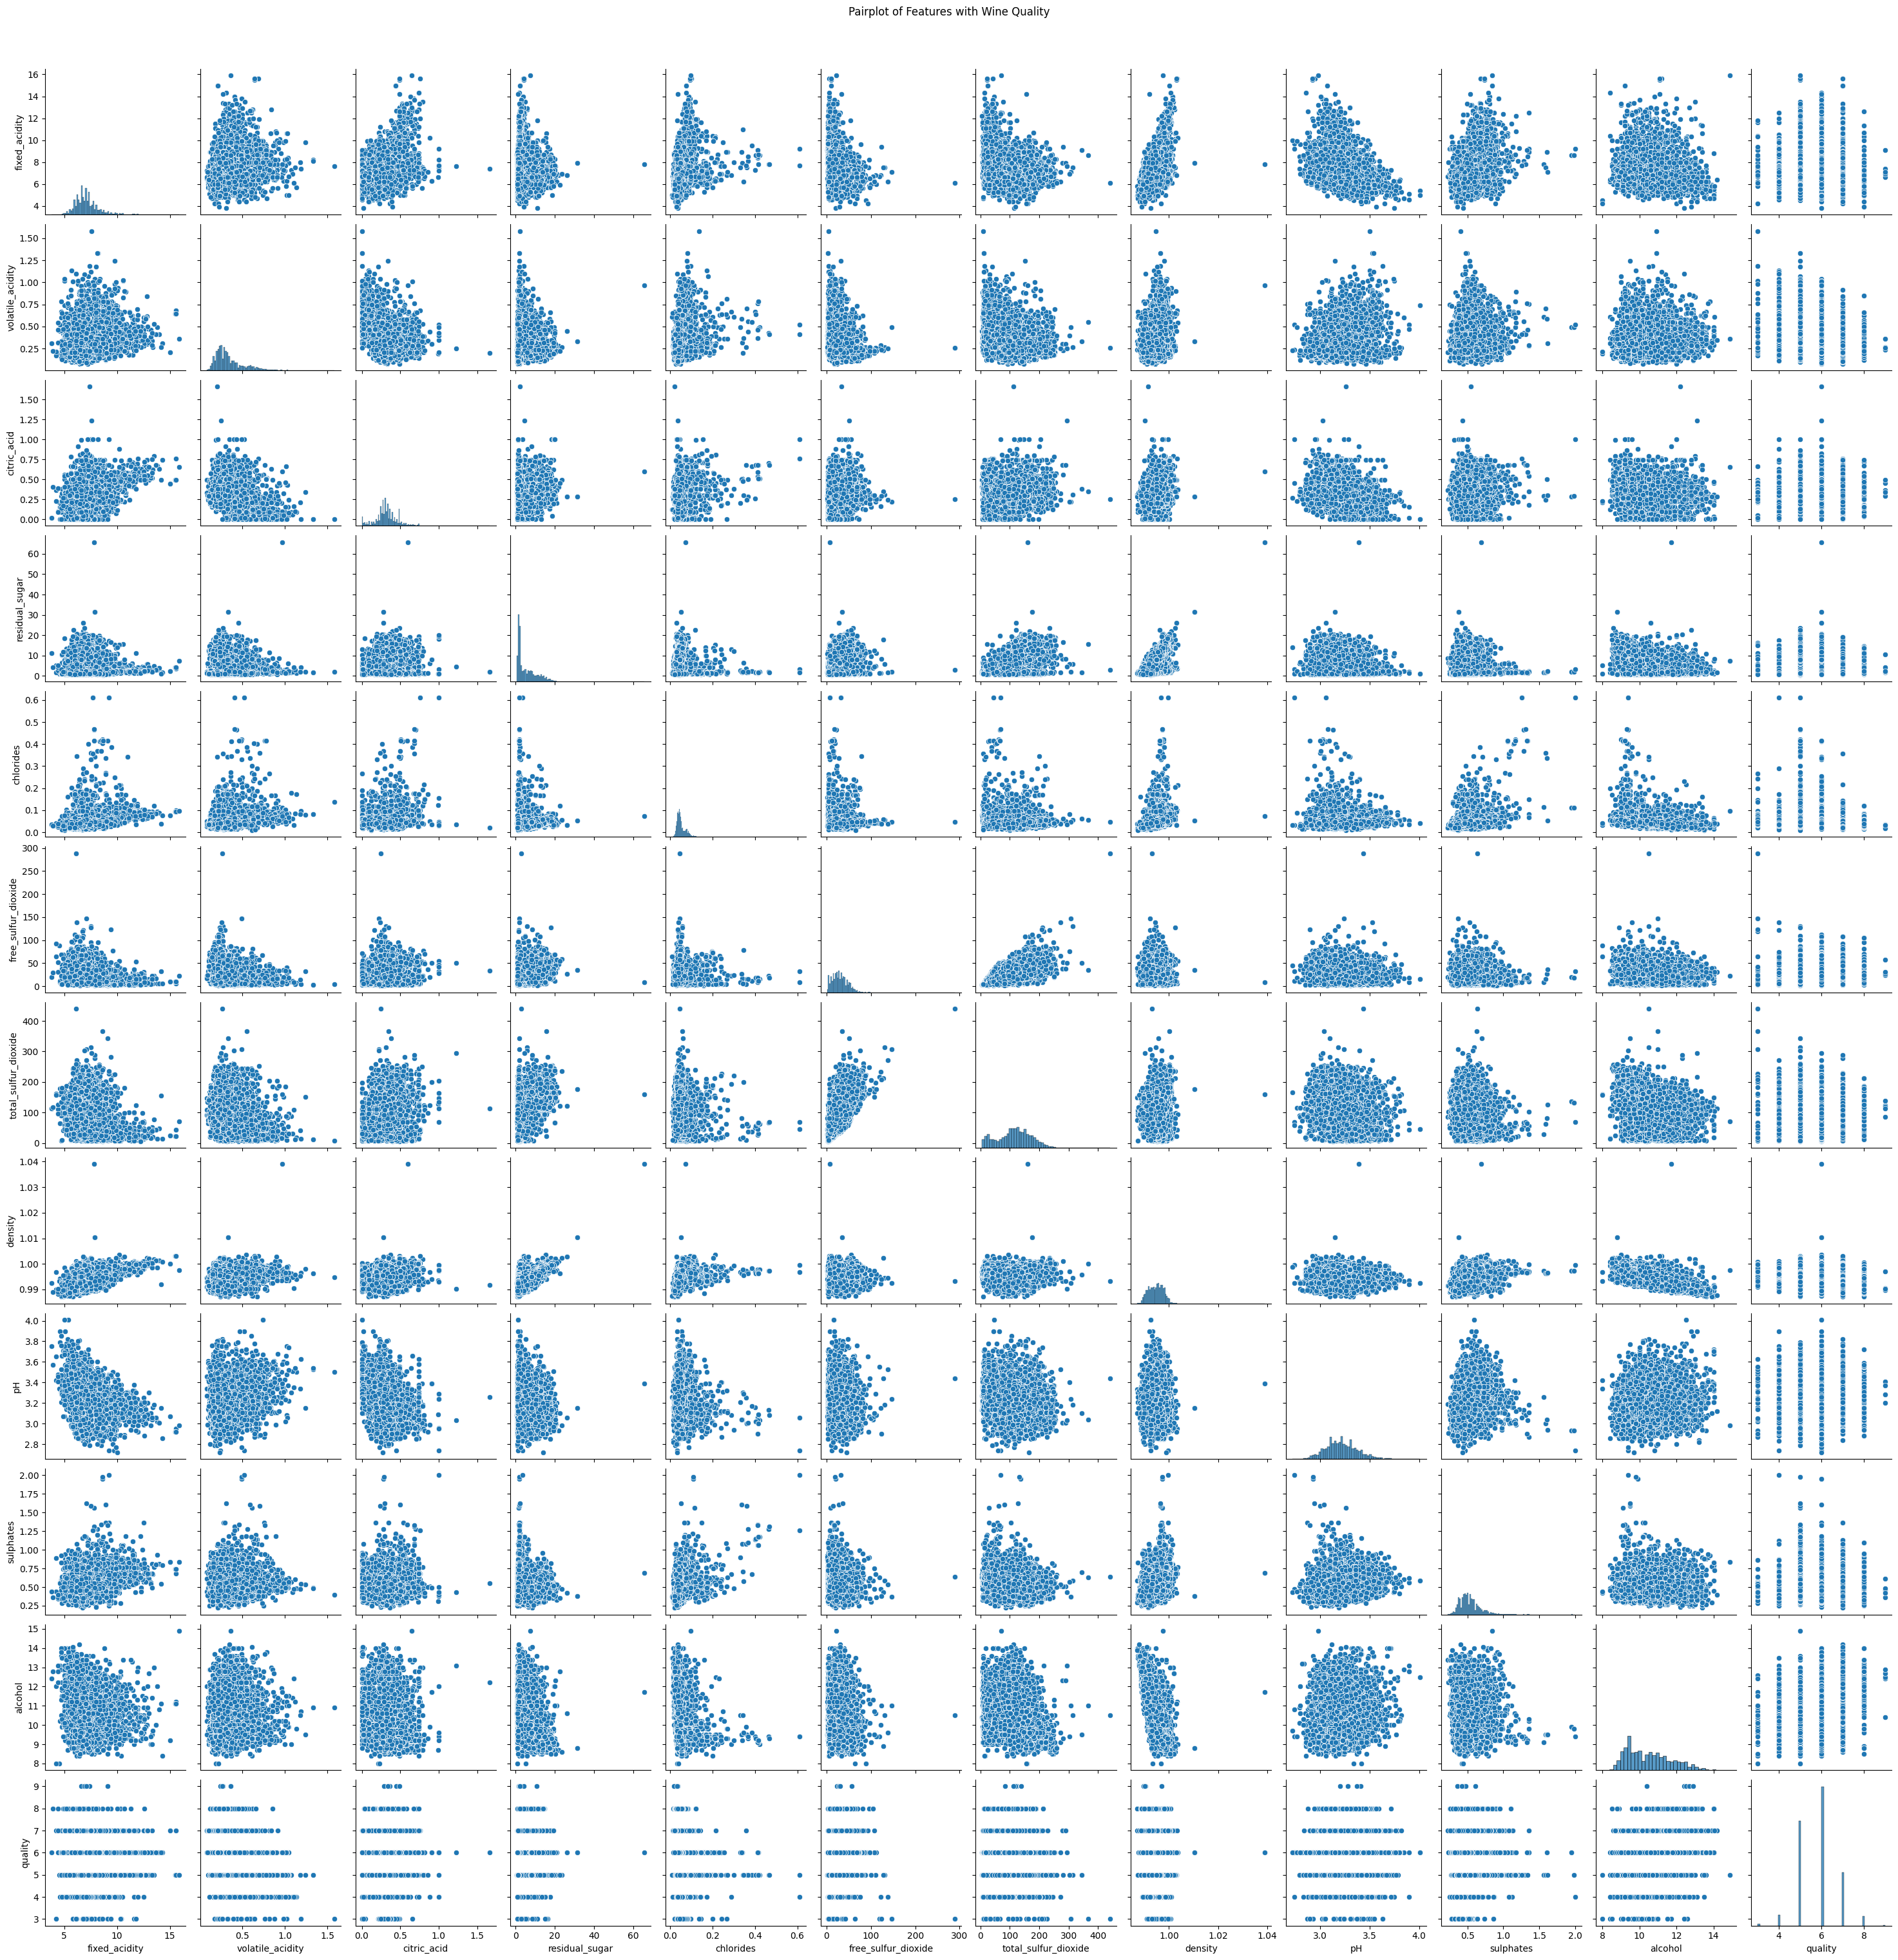

In [7]:
import seaborn as sns

# Explore Pairwise Relationships
# Pairplot between features and target variable
pairplot_data = pd.concat([X_df, y_df], axis=1)
sns.pairplot(pairplot_data)
plt.suptitle("Pairplot of Features with Wine Quality", y=1.02)
plt.show()

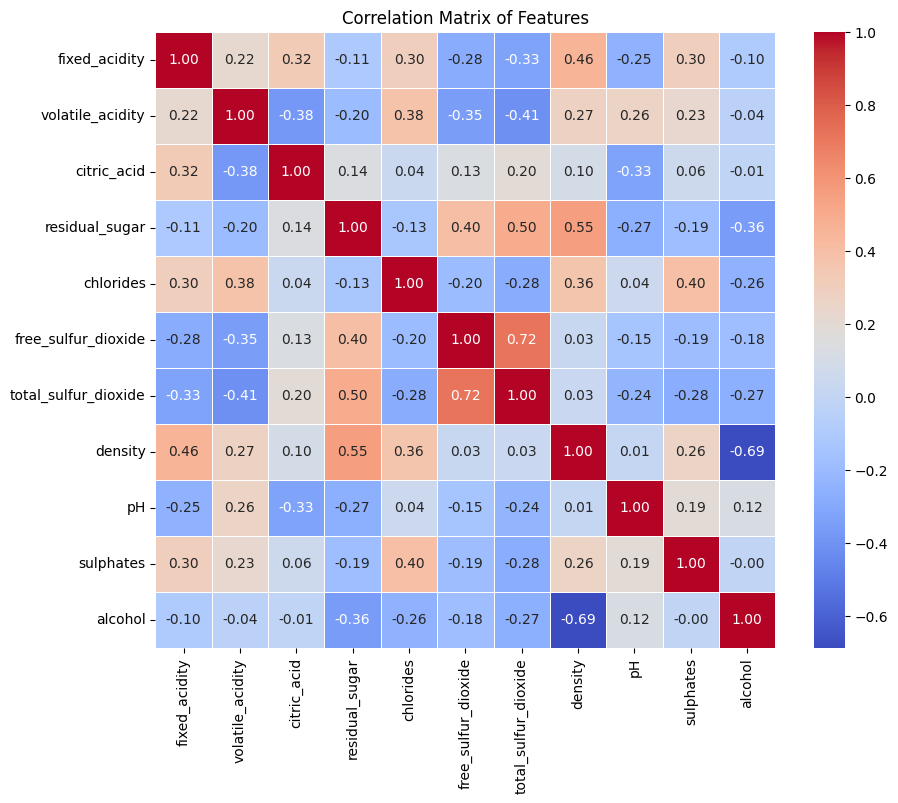

In [8]:
# Correlation Analysis
# Calculate correlations between features
correlation_matrix = X_df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

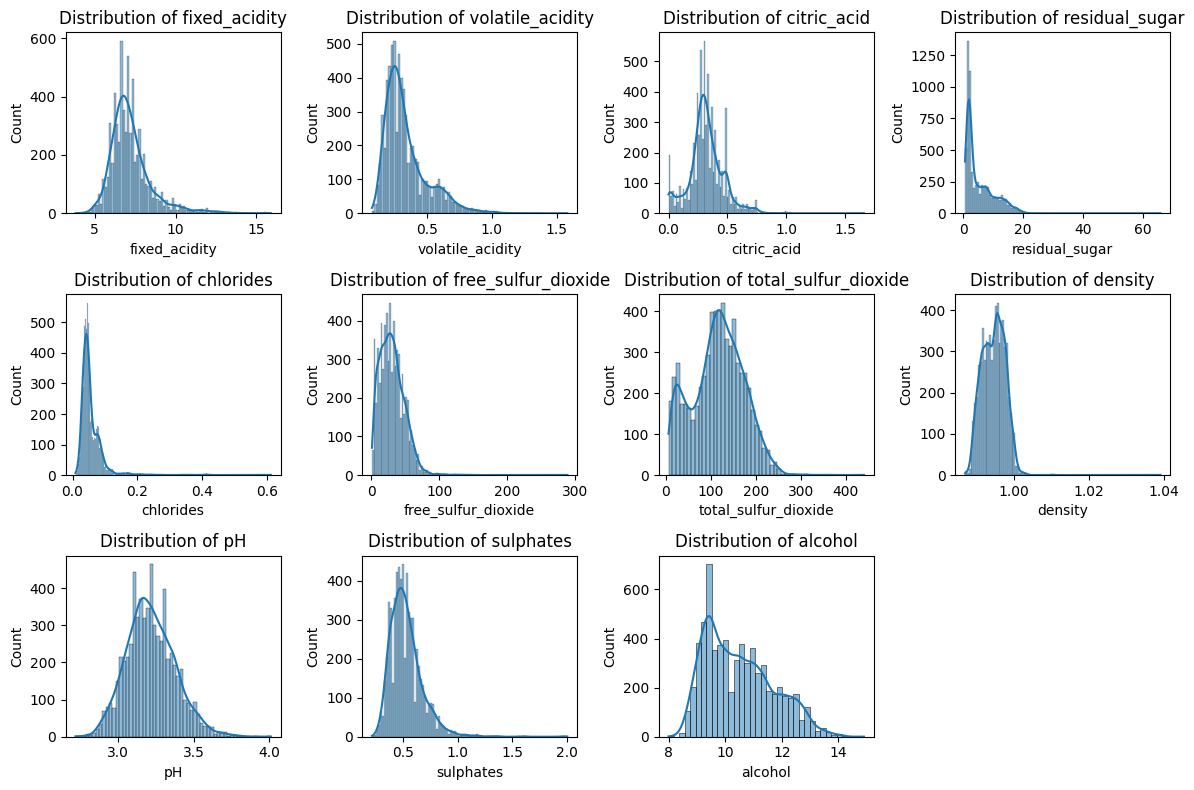

In [ ]:
# Feature Distributions
# Plot histograms for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(X_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Feature Selection
# Using SelectKBest with f_regression (for regression problems)
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate reduced features with logistic regression
lr_pca = LogisticRegression()
lr_pca.fit(X_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

lr_lda = LogisticRegression()
lr_lda.fit(X_lda, y_train)
y_pred_lda = lr_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Accuracy with PCA:", accuracy_pca)
print("Accuracy with LDA:", accuracy_lda)


Accuracy with PCA: 0.46307692307692305
Accuracy with LDA: 0.54


Separate wine classes based on color- red and white

In [ ]:
# Step 1: Loading the dataset
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")

In [ ]:
# Step 2: Checking for null values
print("Red Wine Dataset - Null values:\n", red_wine_data.isnull().sum())
print("\nWhite Wine Dataset - Null values:\n", white_wine_data.isnull().sum())

Red Wine Dataset - Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White Wine Dataset - Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Splitting features and target for both red and white wines
X_red = red_wine_data.drop(columns=['quality'])
y_red = red_wine_data['quality']
X_white = white_wine_data.drop(columns=['quality'])
y_white = white_wine_data['quality']

In [ ]:
# Step 3: Splitting the datasets into train and test sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Dimensionality Reduction using PCA
scaler = StandardScaler()

X_red_train_scaled = scaler.fit_transform(X_red_train)
X_white_train_scaled = scaler.fit_transform(X_white_train)

pca_red = PCA(n_components=2)
X_red_train_pca = pca_red.fit_transform(X_red_train_scaled)

pca_white = PCA(n_components=2)
X_white_train_pca = pca_white.fit_transform(X_white_train_scaled)


In [ ]:
# Dimensionality Reduction using LDA
lda_red = LDA(n_components=2)
X_red_train_lda = lda_red.fit_transform(X_red_train_scaled, y_red_train)

lda_white = LDA(n_components=2)
X_white_train_lda = lda_white.fit_transform(X_white_train_scaled, y_white_train)

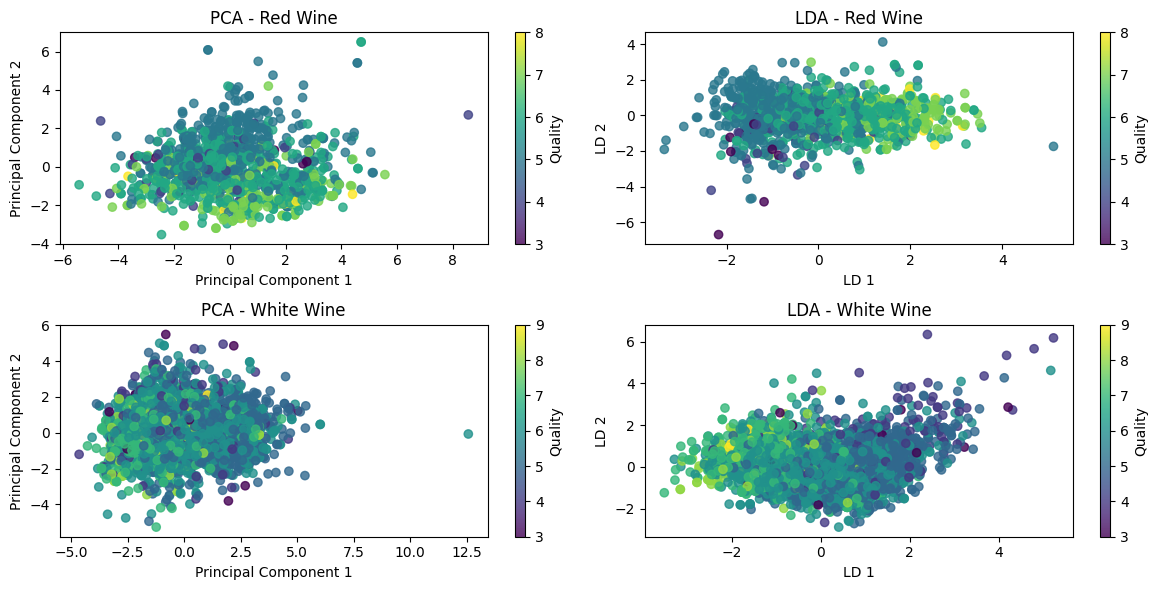

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(X_red_train_pca[:, 0], X_red_train_pca[:, 1], c=y_red_train, cmap='viridis', alpha=0.8)
plt.title('PCA - Red Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')

plt.subplot(2, 2, 2)
plt.scatter(X_red_train_lda[:, 0], X_red_train_lda[:, 1], c=y_red_train, cmap='viridis', alpha=0.8)
plt.title('LDA - Red Wine')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Quality')

plt.subplot(2, 2, 3)
plt.scatter(X_white_train_pca[:, 0], X_white_train_pca[:, 1], c=y_white_train, cmap='viridis', alpha=0.8)
plt.title('PCA - White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')

plt.subplot(2, 2, 4)
plt.scatter(X_white_train_lda[:, 0], X_white_train_lda[:, 1], c=y_white_train, cmap='viridis', alpha=0.8)
plt.title('LDA - White Wine')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Quality')

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Training Random Forest models
rf_red_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_red_lda = RandomForestRegressor(n_estimators=100, random_state=42)
rf_white_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_white_lda = RandomForestRegressor(n_estimators=100, random_state=42)

rf_red_pca.fit(X_red_train_pca, y_red_train)
rf_red_lda.fit(X_red_train_lda, y_red_train)
rf_white_pca.fit(X_white_train_pca, y_white_train)
rf_white_lda.fit(X_white_train_lda, y_white_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Test the models
y_red_pred_pca = rf_red_pca.predict(pca_red.transform(X_red_test))
y_red_pred_lda = rf_red_lda.predict(lda_red.transform(X_red_test))
y_white_pred_pca = rf_white_pca.predict(pca_white.transform(X_white_test))
y_white_pred_lda = rf_white_lda.predict(lda_white.transform(X_white_test))

# Measure the performance of the trained models
mse_red_pca = mean_squared_error(y_red_test, y_red_pred_pca)
mse_red_lda = mean_squared_error(y_red_test, y_red_pred_lda)
mse_white_pca = mean_squared_error(y_white_test, y_white_pred_pca)
mse_white_lda = mean_squared_error(y_white_test, y_white_pred_lda)

print("Red Wine - PCA MSE:", mse_red_pca)
print("Red Wine - LDA MSE:", mse_red_lda)
print("White Wine - PCA MSE:", mse_white_pca)
print("White Wine - LDA MSE:", mse_white_lda)

Red Wine - PCA MSE: 0.7066824999999999
Red Wine - LDA MSE: 0.8774834375000001
White Wine - PCA MSE: 5.033914795918367
White Wine - LDA MSE: 2.487097346938775


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [ ]:
# Calculate additional performance metrics
threshold=5
y_red_pred_pca_binary = (y_red_pred_pca >= threshold).astype(int)
y_red_pred_lda_binary = (y_red_pred_lda >= threshold).astype(int)
y_white_pred_pca_binary = (y_white_pred_pca >= threshold).astype(int)
y_white_pred_lda_binary = (y_white_pred_lda >= threshold).astype(int)

accuracy_red_pca = accuracy_score(y_red_test >= threshold, y_red_pred_pca_binary)
accuracy_red_lda = accuracy_score(y_red_test >= threshold, y_red_pred_lda_binary)
accuracy_white_pca = accuracy_score(y_white_test >= threshold, y_white_pred_pca_binary)
accuracy_white_lda = accuracy_score(y_white_test >= threshold, y_white_pred_lda_binary)

precision_red_pca = precision_score(y_red_test >= threshold, y_red_pred_pca_binary)
precision_red_lda = precision_score(y_red_test >= threshold, y_red_pred_lda_binary)
precision_white_pca = precision_score(y_white_test >= threshold, y_white_pred_pca_binary)
precision_white_lda = precision_score(y_white_test >= threshold, y_white_pred_lda_binary)

recall_red_pca = recall_score(y_red_test >= threshold, y_red_pred_pca_binary)
recall_red_lda = recall_score(y_red_test >= threshold, y_red_pred_lda_binary)
recall_white_pca = recall_score(y_white_test >= threshold, y_white_pred_pca_binary)
recall_white_lda = recall_score(y_white_test >= threshold, y_white_pred_lda_binary)

f1_red_pca = f1_score(y_red_test >= threshold, y_red_pred_pca_binary)
f1_red_lda = f1_score(y_red_test >= threshold, y_red_pred_lda_binary)
f1_white_pca = f1_score(y_white_test >= threshold, y_white_pred_pca_binary)
f1_white_lda = f1_score(y_white_test >= threshold, y_white_pred_lda_binary)

print("Red Wine - PCA:")
print("  Accuracy:", accuracy_red_pca)
print("  Precision:", precision_red_pca)
print("  Recall:", recall_red_pca)
print("  F1 Score:", f1_red_pca)

print("\nRed Wine - LDA:")
print("  Accuracy:", accuracy_red_lda)
print("  Precision:", precision_red_lda)
print("  Recall:", recall_red_lda)
print("  F1 Score:", f1_red_lda)

print("\nWhite Wine - PCA:")
print("  Accuracy:", accuracy_white_pca)
print("  Precision:", precision_white_pca)
print("  Recall:", recall_white_pca)
print("  F1 Score:", f1_white_pca)

print("\nWhite Wine - LDA:")
print("  Accuracy:", accuracy_white_lda)
print("  Precision:", precision_white_lda)
print("  Recall:", recall_white_lda)
print("  F1 Score:", f1_white_lda)


Red Wine - PCA:
  Accuracy: 0.965625
  Precision: 0.9685534591194969
  Recall: 0.9967637540453075
  F1 Score: 0.9824561403508772

Red Wine - LDA:
  Accuracy: 0.9625
  Precision: 0.9655172413793104
  Recall: 0.9967637540453075
  F1 Score: 0.9808917197452229

White Wine - PCA:
  Accuracy: 0.03163265306122449
  Precision: 1.0
  Recall: 0.0010526315789473684
  F1 Score: 0.002103049421661409

White Wine - LDA:
  Accuracy: 0.9683673469387755
  Precision: 0.9693564862104188
  Recall: 0.9989473684210526
  F1 Score: 0.9839294971487816
